# Logistic Regression Analysis

### Libraries

We utilize both external libraries, like numpy and scikit-learn, as well as internally written libraries for the sake of modularity and simplicity of code within this notebook. The goal for modularizing the code base is so that running the different algorithms here can be clean and require as few parameters and extraneous code blocks as possible, enabling us to focus on analysis.

In [1]:
# External libraries:
import numpy as np
from sklearn.model_selection import train_test_split

# Internal libraries:
import datasets.data as data
from descent_algorithms import *
from learning_rates import *
from models import *
from util import *

Using TensorFlow backend.


### Data
We use three different datasets for our analysis of our algorithms, all of which provide a binary classification problem (??? 0 or 1 ???). (DESCRIPTION OF THREE DATASETS HERE AND HOW THEY ARE PREPPED IN THE data.py FILE)

Here, we read in the data vectors and labels using the datasets/data utility functions, and then perform a train/test split of 80%/20% of the provided samples. The splitting is done using the train_test_split function from the sklearn.model_selection package, which randomizes the splits.

In [2]:
features, labels = data.load_wisconsin_breast_cancer()
wbc_X_train, wbc_X_test, wbc_y_train, wbc_y_test = train_test_split(
    features, labels, test_size=0.2)
wbc_n = wbc_X_train.shape[0]

M_features, M_labels = data.load_MNIST_13()
mnist_X_train, mnist_X_test, mnist_y_train, mnist_y_test = train_test_split(
    M_features, M_labels, test_size = 0.2)
mnist_n = mnist_X_train.shape[0]

cod_features, cod_labels = data.load_cod_rna()
cod_X_train, cod_X_test, cod_y_train, cod_y_test = train_test_split(
    cod_features, cod_labels, test_size = 0.2)
cod_n = cod_X_train.shape[0]

### Comparative Measures
We use a relative convergence measure of 0.000001 (1/10000% change in loss between iterations), in order to determine whether or not an algorithm has converged. This allows us to directly compare the various descent methods and learning rates (?? and regularizations ??) for convergence rate.

Additionally, we keep track of the final loss converged too, the resultant test accuracy, and the time per iteration in order to fully compare the relative performance of the all of the algorithms.

In [3]:
# relative convergence limit
rel_conv = 0.000001

### Fixed Learning Rate
We begin our analysis with a look at the fixed learning rate convergence for our GD, SGD, AGD, and SVRG algorithms on our three datasets.

The default learning rate for fixed is set to 0.01.

In [5]:
# initialize our learning rate object
lr = FixedRate()

#### Wisconsin Breast Cancer Data
Then, we setup the run for all of our descent methods on the Wisconsin Breast Cancer dataset, beginning with the initialization of each of our descent method objects.

In [6]:
# initialize our descent methods
gd = GradientDescent()
sgd_1 = GradientDescent() # the GD algorithm is used for all SGD algorithms, 
                          # with the smaller batch size specified in the model
sgd_10 = GradientDescent()
sgd_100 = GradientDescent()
agd = NesterovAcceleratedDescent()
svrg = StochasticVarianceReducedGradientDescent()
md = MirrorDescent()

Next, we initialize all of our model objects (all logistic regression models in this case), with the appropriate parameters for each algorithm.

In [7]:
# LogisticRegression(DescentAlgorithm, LearningRate, max iterations, 
# batch size, relative convergence)
gd_log = LogisticRegression(gd, lr, 5000, wbc_n, rel_conv)
sgd_1_log = LogisticRegression(sgd_1, lr, 2000, 1, rel_conv)
sgd_10_log = LogisticRegression(sgd_10, lr, 4000, 10, rel_conv)
sgd_100_log = LogisticRegression(sgd_100, lr, 4000, 100, rel_conv)
agd_log = LogisticRegression(agd, lr, 400, wbc_n, rel_conv)
svrg_log = LogisticRegression(svrg, lr, 20, wbc_n, rel_conv)
md_log = LogisticRegression(md, lr, 2000, wbc_n, rel_conv)

Then, we run the fit for each model:

In [8]:
print('Fitting gradient descent:')
wbc_gd_loss = gd_log.fit(wbc_X_train, wbc_y_train)
print('\nFitting stochastic gradient descent, batch size = 1:')
wbc_sgd_1_loss = sgd_1_log.fit(wbc_X_train, wbc_y_train)
print('\nFitting stochastic gradient descent, batch size = 10:')
wbc_sgd_10_loss = sgd_10_log.fit(wbc_X_train, wbc_y_train)
print('\nFitting stochastic gradient descent, batch size = 100:')
wbc_sgd_100_loss = sgd_100_log.fit(wbc_X_train, wbc_y_train)
print('\nFitting accelerated gradient descent:')
wbc_agd_loss = agd_log.fit(wbc_X_train, wbc_y_train)
print('\nFitting stochastic variance reduced gradient descent:')
wbc_svrg_loss = svrg_log.fit(wbc_X_train, wbc_y_train)
print('\nFitting mirror descent:')
wbc_md_loss = md_log.fit(wbc_X_train, wbc_y_train)

Fitting gradient descent:
Iter:        0 train loss: 376.017
Iter:      500 train loss: 207.265
Iter:     1000 train loss: 194.360
Iter:     1500 train loss: 190.220
Iter:     2000 train loss: 188.466
Iter:     2500 train loss: 187.616
Iter:     3000 train loss: 187.172
Iter:     3500 train loss: 186.928
Iter:     4000 train loss: 186.790
Converged in 4095 iterations.

Fitting stochastic gradient descent, batch size = 1:
Iter:        0 train loss: 401.483
Iter:      200 train loss: 231.033
Iter:      400 train loss: 233.352
Iter:      600 train loss: 212.603
Iter:      800 train loss: 197.096
Converged in 899 iterations.

Fitting stochastic gradient descent, batch size = 10:
Iter:        0 train loss: 369.480
Iter:      400 train loss: 213.426
Iter:      800 train loss: 197.951
Iter:     1200 train loss: 192.405
Iter:     1600 train loss: 190.127
Iter:     2000 train loss: 188.983
Iter:     2400 train loss: 189.858
Iter:     2800 train loss: 187.515
Iter:     3200 train loss: 187.518
I

In [9]:
acc = check_accuracy(gd_log, wbc_X_test, wbc_y_test)
print("GD Accuracy: {0:.2f}%".format(acc * 100))
acc = check_accuracy(sgd_1_log, wbc_X_test, wbc_y_test)
print("SGD 1 Accuracy: {0:.2f}%".format(acc * 100))
acc = check_accuracy(sgd_10_log, wbc_X_test, wbc_y_test)
print("SGD 10 Accuracy: {0:.2f}%".format(acc * 100))
acc = check_accuracy(sgd_100_log, wbc_X_test, wbc_y_test)
print("SGD 100 Accuracy: {0:.2f}%".format(acc * 100))
acc = check_accuracy(agd_log, wbc_X_test, wbc_y_test)
print("AGD Accuracy: {0:.2f}%".format(acc * 100))
acc = check_accuracy(svrg_log, wbc_X_test, wbc_y_test)
print("SVRG Accuracy: {0:.2f}%".format(acc * 100))
acc = check_accuracy(md_log, wbc_X_test, wbc_y_test)
print("MD Accuracy: {0:.2f}%".format(acc * 100))

GD Accuracy: 84.29%
SGD 1 Accuracy: 85.71%
SGD 10 Accuracy: 84.29%
SGD 100 Accuracy: 84.29%
AGD Accuracy: 84.29%
SVRG Accuracy: 84.29%
MD Accuracy: 84.29%


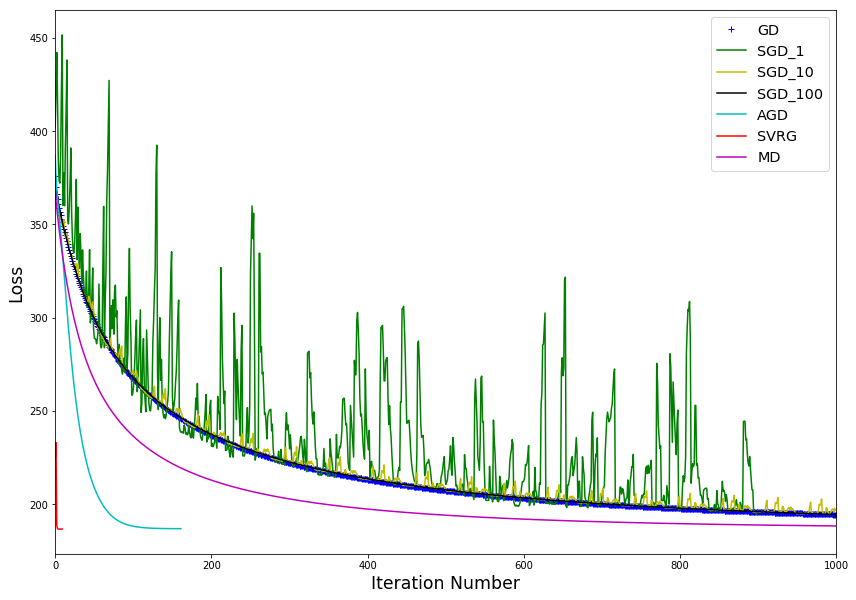

In [11]:
plot_fixed_losses(wbc_gd_loss, wbc_sgd_1_loss, wbc_sgd_10_loss, wbc_sgd_100_loss, wbc_agd_loss, wbc_svrg_loss, wbc_md_loss)

#### MNIST Data
Then, we setup the run for all of our descent methods on the MNIST dataset, beginning with the initialization of each of our descent method objects. We combine the cells here and reduce the footprint, as the usage is the same as above.

In [ ]:
lr = FixedRate(0.000001)
# initialize our descent methods
gd = GradientDescent()
sgd_1 = GradientDescent() 
sgd_10 = GradientDescent()
sgd_100 = GradientDescent()
agd = NesterovAcceleratedDescent()
svrg = StochasticVarianceReducedGradientDescent()
md = MirrorDescent()
# initialize the logisitic regression objects
gd_log = LogisticRegression(gd, lr, 5000, mnist_n, rel_conv)
sgd_1_log = LogisticRegression(sgd_1, lr, 5000, 1, rel_conv)
sgd_10_log = LogisticRegression(sgd_10, lr, 5000, 10, rel_conv)
sgd_100_log = LogisticRegression(sgd_100, lr, 5000, 100, rel_conv)
agd_log = LogisticRegression(agd, lr, 2000, mnist_n, rel_conv)
svrg_log = LogisticRegression(svrg, lr, 40, mnist_n, rel_conv)
md_log = LogisticRegression(md, lr, 3000, mnist_n, rel_conv)
# and run the fit for each of these models, this time on the MNIST data set:
print('Fitting gradient descent:')
mnist_gd_loss = gd_log.fit(mnist_X_train, mnist_y_train)
print('\nFitting stochastic gradient descent, batch size = 1:')
mnist_sgd_1_loss = sgd_1_log.fit(mnist_X_train, mnist_y_train)
print('\nFitting stochastic gradient descent, batch size = 10:')
mnist_sgd_10_loss = sgd_10_log.fit(mnist_X_train, mnist_y_train)
print('\nFitting stochastic gradient descent, batch size = 100:')
mnist_sgd_100_loss = sgd_100_log.fit(mnist_X_train, mnist_y_train)
print('\nFitting accelerated gradient descent:')
mnist_agd_loss = agd_log.fit(mnist_X_train, mnist_y_train)
print('\nFitting stochastic variance reduced gradient descent:')
mnist_svrg_loss = svrg_log.fit(mnist_X_train, mnist_y_train)
print('\nFitting mirror descent:')
mnist_md_loss = md_log.fit(mnist_X_train, mnist_y_train)
# displaying accuracies
acc = check_accuracy(gd_log, mnist_X_test, mnist_y_test)
print("\n\nGD Accuracy: {0:.2f}%".format(acc * 100))
acc = check_accuracy(sgd_1_log, mnist_X_test, mnist_y_test)
print("SGD 1 Accuracy: {0:.2f}%".format(acc * 100))
acc = check_accuracy(sgd_10_log, mnist_X_test, mnist_y_test)
print("SGD 10 Accuracy: {0:.2f}%".format(acc * 100))
acc = check_accuracy(sgd_100_log, mnist_X_test, mnist_y_test)
print("SGD 100 Accuracy: {0:.2f}%".format(acc * 100))
acc = check_accuracy(agd_log, mnist_X_test, mnist_y_test)
print("AGD Accuracy: {0:.2f}%".format(acc * 100))
acc = check_accuracy(svrg_log, mnist_X_test, mnist_y_test)
print("SVRG Accuracy: {0:.2f}%".format(acc * 100))
acc = check_accuracy(md_log, mnist_X_test, mnist_y_test)
print("MD Accuracy: {0:.2f}%".format(acc * 100))
# plot losses
plot_losses(mnist_gd_loss, mnist_sgd_1_loss, mnist_sgd_10_loss, 
            mnist_sgd_100_loss, mnist_agd_loss, mnist_svrg_loss, 
            mnist_md_loss)

#### COD-RNA Data
Lastly, we setup the run for all of our descent methods on the COD-RNA dataset, again using a reduced-frill cell to run our fit for each method's model.

In [ ]:
lr = FixedRate(0.001)
# initialize our descent methods
gd = GradientDescent()
sgd_1 = GradientDescent()
sgd_10 = GradientDescent()
sgd_100 = GradientDescent()
agd = NesterovAcceleratedDescent()
svrg = StochasticVarianceReducedGradientDescent()
md = MirrorDescent()
# initialize the logisitic regression objects
gd_log = LogisticRegression(gd, lr, 5000, cod_n, rel_conv)
sgd_1_log = LogisticRegression(sgd_1, lr, 2000, 1, rel_conv)
sgd_10_log = LogisticRegression(sgd_10, lr, 2000, 10, rel_conv)
sgd_100_log = LogisticRegression(sgd_100, lr, 2000, 100, rel_conv)
agd_log = LogisticRegression(agd, lr, 200, cod_n, rel_conv)
svrg_log = LogisticRegression(svrg, lr, 20, cod_n, rel_conv)
md_log = LogisticRegression(md, lr, 2000, cod_n, rel_conv)
# and run the fit for each of these models, this time on the MNIST data set:
print('Fitting gradient descent:')
cod_gd_loss = gd_log.fit(cod_X_train, cod_y_train)
print('\nFitting stochastic gradient descent, batch size = 1:')
cod_sgd_1_loss = sgd_1_log.fit(cod_X_train, wbc_y_train)
print('\nFitting stochastic gradient descent, batch size = 10:')
cod_sgd_10_loss = sgd_10_log.fit(cod_X_train, wbc_y_train)
print('\nFitting stochastic gradient descent, batch size = 100:')
cod_sgd_100_loss = sgd_100_log.fit(cod_X_train, wbc_y_train)
print('\nFitting accelerated gradient descent:')
cod_agd_loss = agd_log.fit(cod_X_train, wbc_y_train)
print('\nFitting stochastic variance reduced gradient descent:')
cod_svrg_loss = svrg_log.fit(cod_X_train, wbc_y_train)
print('\nFitting stochastic variance reduced gradient descent:')
cod_svrg_loss = svrg_log.fit(cod_X_train, wbc_y_train)
# displaying accuracies
acc = check_accuracy(gd_log, cod_X_test, cod_y_test)
print("\n\nGD Accuracy: {0:.2f}%".format(acc * 100))
acc = check_accuracy(sgd_1_log, cod_X_test, cod_y_test)
print("SGD 1 Accuracy: {0:.2f}%".format(acc * 100))
acc = check_accuracy(sgd_10_log, cod_X_test, cod_y_test)
print("SGD 10 Accuracy: {0:.2f}%".format(acc * 100))
acc = check_accuracy(sgd_100_log, cod_X_test, cod_y_test)
print("SGD 100 Accuracy: {0:.2f}%".format(acc * 100))
acc = check_accuracy(agd_log, cod_X_test, cod_y_test)
print("AGD Accuracy: {0:.2f}%".format(acc * 100))
acc = check_accuracy(svrg_log, cod_X_test, cod_y_test)
print("SVRG Accuracy: {0:.2f}%".format(acc * 100))
acc = check_accuracy(md_log, cod_X_test, cod_y_test)
print("MD Accuracy: {0:.2f}%".format(acc * 100))
# plot losses
plot_losses(cod_gd_loss, cod_sgd_1_loss, cod_sgd_10_loss, 
            cod_sgd_100_loss, cod_agd_loss, cod_svrg_loss, 
            cod_md_loss)

### Polynomial Decaying Learning Rate
We begin our analysis with a look at the polynomial decaying learning rate convergence for our GD, SGD, AGD, and SVRG algorithms on our three datasets.

The default learning rate for fixed is set to 0.01, and a gamma value of 0.0001.

#### Wisconsin Breast Cancer Data
Then, we setup the run for all of our descent methods on the Wisconsin Breast Cancer dataset, beginning with the initialization of each of our descent method objects.

Fitting gradient descent:
Iter:        0 train loss: 401.586
Iter:      200 train loss: 192.062
Converged in 348 iterations.

Fitting stochastic gradient descent, batch size = 1:
Iter:        0 train loss: 404.728
Iter:      200 train loss: 233.344
Iter:      400 train loss: 215.524
Iter:      600 train loss: 220.859
Iter:      800 train loss: 211.266
Converged in 974 iterations.

Fitting mirror descent:
Iter:        0 train loss: 544.344
Iter:      200 train loss: 186.859
Converged in 364 iterations.


GD Accuracy: 85.00%
SGD 1 Accuracy: 87.14%
MD Accuracy: 84.29%


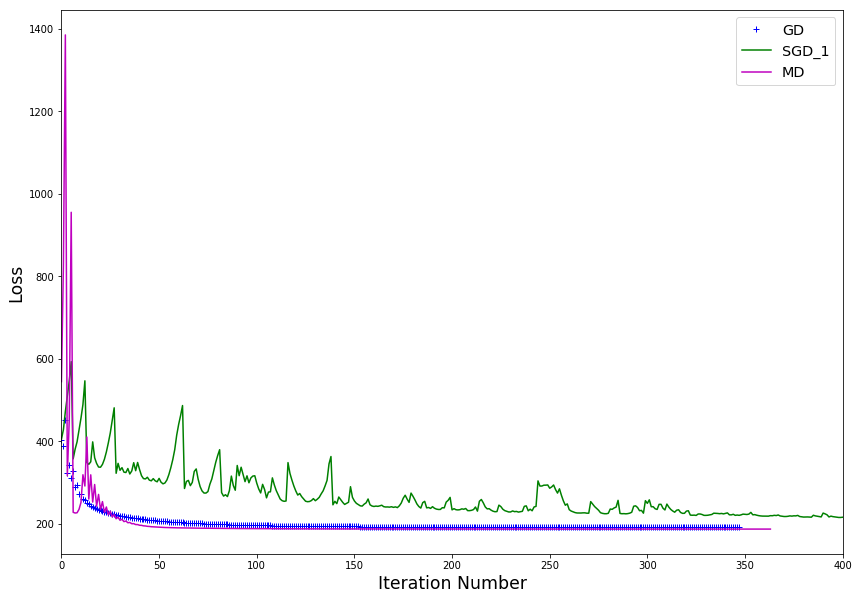

In [14]:
# initialize our learning rate object
lr_gd = PolyDecayRate(0.1, 0.0001)
lr_sgd = PolyDecayRate(0.01, 0.00001)
lr_md = PolyDecayRate(0.1, 0.00001)
# initialize our descent methods
gd = GradientDescent()
sgd_1 = GradientDescent()
md = MirrorDescent()
# initialize logistic regression models
gd_log = LogisticRegression(gd, lr_gd, 2000, wbc_n, rel_conv)
sgd_1_log = LogisticRegression(sgd_1, lr_sgd, 2000, 1, rel_conv)
md_log = LogisticRegression(md, lr_md, 2000, wbc_n, rel_conv)
# fit the models...
print('Fitting gradient descent:')
wbc_gd_loss = gd_log.fit(wbc_X_train, wbc_y_train)
print('\nFitting stochastic gradient descent, batch size = 1:')
wbc_sgd_1_loss = sgd_1_log.fit(wbc_X_train, wbc_y_train)
print('\nFitting mirror descent:')
wbc_md_loss = md_log.fit(wbc_X_train, wbc_y_train)
# print the test accuracies for each model
acc = check_accuracy(gd_log, wbc_X_test, wbc_y_test)
print("\n\nGD Accuracy: {0:.2f}%".format(acc * 100))
acc = check_accuracy(sgd_1_log, wbc_X_test, wbc_y_test)
print("SGD 1 Accuracy: {0:.2f}%".format(acc * 100))
acc = check_accuracy(md_log, wbc_X_test, wbc_y_test)
print("MD Accuracy: {0:.2f}%".format(acc * 100))
# plot the loss convergences for each model
plot_dynamic_losses(wbc_gd_loss, wbc_sgd_1_loss, wbc_md_loss)

In [16]:
# initialize our learning rate object
lr_gd = PolyDecayRate(0.01, 0.0001)
lr_sgd = PolyDecayRate(0.01, 0.00001)
lr_md = PolyDecayRate(0.1, 0.00001)
# initialize our descent methods
gd = GradientDescent()
sgd_1 = GradientDescent()
md = MirrorDescent()
# initialize logistic regression models
gd_log = LogisticRegression(gd, lr_gd, 2000, mnist_n, rel_conv)
sgd_1_log = LogisticRegression(sgd_1, lr_sgd, 2000, 1, rel_conv)
md_log = LogisticRegression(md, lr_md, 2000, mnist_n, rel_conv)
# fit the models...
print('Fitting gradient descent:')
mnist_gd_loss = gd_log.fit(mnist_X_train, mnist_y_train)
print('\nFitting stochastic gradient descent, batch size = 1:')
mnist_sgd_1_loss = sgd_1_log.fit(mnist_X_train, mnist_y_train)
print('\nFitting mirror descent:')
mnist_md_loss = md_log.fit(mnist_X_train, mnist_y_train)
# print the test accuracies for each model
acc = check_accuracy(gd_log, mnist_X_test, mnist_y_test)
print("\n\nGD Accuracy: {0:.2f}%".format(acc * 100))
acc = check_accuracy(sgd_1_log, mnist_X_test, mnist_y_test)
print("SGD 1 Accuracy: {0:.2f}%".format(acc * 100))
acc = check_accuracy(md_log, mnist_X_test, mnist_y_test)
print("MD Accuracy: {0:.2f}%".format(acc * 100))
# plot the loss convergences for each model
plot_dynamic_losses(mnist_gd_loss, mnist_sgd_1_loss, mnist_md_loss)

Fitting gradient descent:
Iter:        0 train loss: nan


KeyboardInterrupt: 

#### COD-RNA Data
Lastly, we setup the run for all of our descent methods on the COD-RNA dataset, again using a reduced-frill cell to run our fit for each method's model.

In [ ]:
lr = FixedRate(0.001)
# initialize our descent methods
gd = GradientDescent()
sgd_1 = GradientDescent()
sgd_10 = GradientDescent()
sgd_100 = GradientDescent()
agd = NesterovAcceleratedDescent()
svrg = StochasticVarianceReducedGradientDescent()
md = MirrorDescent()
# initialize the logisitic regression objects
gd_log = LogisticRegression(gd, lr, 5000, cod_n, rel_conv)
sgd_1_log = LogisticRegression(sgd_1, lr, 2000, 1, rel_conv)
sgd_10_log = LogisticRegression(sgd_10, lr, 2000, 10, rel_conv)
sgd_100_log = LogisticRegression(sgd_100, lr, 2000, 100, rel_conv)
agd_log = LogisticRegression(agd, lr, 200, cod_n, rel_conv)
svrg_log = LogisticRegression(svrg, lr, 20, cod_n, rel_conv)
md_log = LogisticRegression(md, lr, 2000, cod_n, rel_conv)
# and run the fit for each of these models, this time on the MNIST data set:
print('Fitting gradient descent:')
cod_gd_loss = gd_log.fit(cod_X_train, cod_y_train)
print('\nFitting stochastic gradient descent, batch size = 1:')
cod_sgd_1_loss = sgd_1_log.fit(cod_X_train, wbc_y_train)
print('\nFitting stochastic gradient descent, batch size = 10:')
cod_sgd_10_loss = sgd_10_log.fit(cod_X_train, wbc_y_train)
print('\nFitting stochastic gradient descent, batch size = 100:')
cod_sgd_100_loss = sgd_100_log.fit(cod_X_train, wbc_y_train)
print('\nFitting accelerated gradient descent:')
cod_agd_loss = agd_log.fit(cod_X_train, wbc_y_train)
print('\nFitting stochastic variance reduced gradient descent:')
cod_svrg_loss = svrg_log.fit(cod_X_train, wbc_y_train)
print('\nFitting stochastic variance reduced gradient descent:')
cod_svrg_loss = svrg_log.fit(cod_X_train, wbc_y_train)
# displaying accuracies
acc = check_accuracy(gd_log, cod_X_test, cod_y_test)
print("\n\nGD Accuracy: {0:.2f}%".format(acc * 100))
acc = check_accuracy(sgd_1_log, cod_X_test, cod_y_test)
print("SGD 1 Accuracy: {0:.2f}%".format(acc * 100))
acc = check_accuracy(sgd_10_log, cod_X_test, cod_y_test)
print("SGD 10 Accuracy: {0:.2f}%".format(acc * 100))
acc = check_accuracy(sgd_100_log, cod_X_test, cod_y_test)
print("SGD 100 Accuracy: {0:.2f}%".format(acc * 100))
acc = check_accuracy(agd_log, cod_X_test, cod_y_test)
print("AGD Accuracy: {0:.2f}%".format(acc * 100))
acc = check_accuracy(svrg_log, cod_X_test, cod_y_test)
print("SVRG Accuracy: {0:.2f}%".format(acc * 100))
acc = check_accuracy(md_log, cod_X_test, cod_y_test)
print("MD Accuracy: {0:.2f}%".format(acc * 100))
# plot losses
plot_losses(cod_gd_loss, cod_sgd_1_loss, cod_sgd_10_loss, 
            cod_sgd_100_loss, cod_agd_loss, cod_svrg_loss, 
            cod_md_loss)

### Exponential Decaying Learning Rate
Lastly, we analyze an exponentially decaying learning rate for convergence for our GD, SGD, AGD, and SVRG algorithms on our three datasets.

The default learning rate for fixed is set to 0.01, and a gamma value of 0.0001.

#### Wisconsin Breast Cancer Data
Then, we setup the run for all of our descent methods on the Wisconsin Breast Cancer dataset, beginning with the initialization of each of our descent method objects.

Fitting gradient descent:
Iter:        0 train loss: 401.586
Iter:      200 train loss: 188.881
Iter:      400 train loss: 186.997
Iter:      600 train loss: 186.705
Converged in 798 iterations.

Fitting stochastic gradient descent, batch size = 1:
Iter:        0 train loss: 406.222
Iter:      200 train loss: 290.154
Iter:      400 train loss: 216.961
Iter:      600 train loss: 208.900
Iter:      800 train loss: 214.102
Iter:     1000 train loss: 200.159
Iter:     1200 train loss: 199.032
Converged in 1279 iterations.

Fitting mirror descent:
Iter:        0 train loss: 544.189
Iter:      200 train loss: 186.828
Iter:      400 train loss: 186.612
Converged in 403 iterations.


GD Accuracy: 84.29%
SGD 1 Accuracy: 85.00%
MD Accuracy: 84.29%


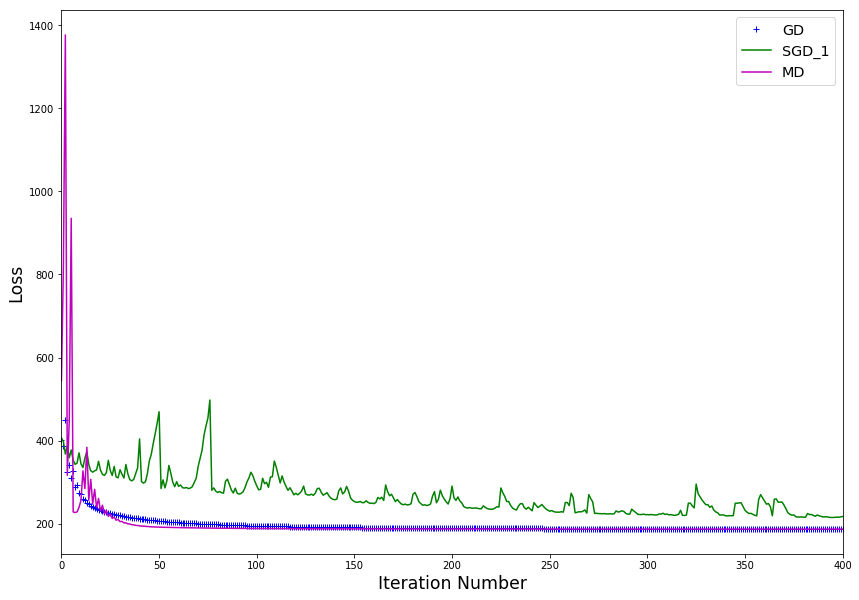

In [18]:
# initialize our learning rate object
lr_gd = ExpDecayRate(0.1, 0.001)
lr_sgd = ExpDecayRate(0.01, 0.001)
lr_md = ExpDecayRate(0.1, 0.001)
# initialize our descent methods
gd = GradientDescent()
sgd_1 = GradientDescent()
md = MirrorDescent()
# initialize logistic regression models
gd_log = LogisticRegression(gd, lr_gd, 2000, wbc_n, rel_conv)
sgd_1_log = LogisticRegression(sgd_1, lr_sgd, 2000, 1, rel_conv)
md_log = LogisticRegression(md, lr_md, 2000, wbc_n, rel_conv)
# fit the models...
print('Fitting gradient descent:')
wbc_gd_loss = gd_log.fit(wbc_X_train, wbc_y_train)
print('\nFitting stochastic gradient descent, batch size = 1:')
wbc_sgd_1_loss = sgd_1_log.fit(wbc_X_train, wbc_y_train)
print('\nFitting mirror descent:')
wbc_md_loss = md_log.fit(wbc_X_train, wbc_y_train)
# print the test accuracies for each model
acc = check_accuracy(gd_log, wbc_X_test, wbc_y_test)
print("\n\nGD Accuracy: {0:.2f}%".format(acc * 100))
acc = check_accuracy(sgd_1_log, wbc_X_test, wbc_y_test)
print("SGD 1 Accuracy: {0:.2f}%".format(acc * 100))
acc = check_accuracy(md_log, wbc_X_test, wbc_y_test)
print("MD Accuracy: {0:.2f}%".format(acc * 100))
# plot the loss convergences for each model
plot_dynamic_losses(wbc_gd_loss, wbc_sgd_1_loss, wbc_md_loss)

Run notes:

FIRST:
lr:
    - fixed: GD(0.01), SGD(0.01) - batched at 1,10,100 , SVRG(0.01), Nest(0.01)
    - polydecay: GD(0.01, 0.0001), SGD(0.01, 0.00001) - batched, SVRG(N/A), Nest(N/A)
    - expdecay: GD(0.1,0.001), SGD(0.1,.001) - batched, SVRG(N/A), Nest(N/A)